**Name:**  Talha Shahzad

**Section:** C

**Roll#**  21i-0540

**Numerical Assignment # 2**

In [73]:
import numpy as np
import pandas as pd
import math as mt
import matplotlib.pyplot as plt


In [74]:
data = pd.read_csv("Anscombe_quartet_data.csv")

#getting the Subset II data
XII=data['x123']
YII=data['y2']

#storing subset II data in sorted from
x2=np.sort(XII)
y2=np.sort(YII)

#Getting subset of Subset II  for Langrange
X1=x2[4:-1]
Y1=y2[4:-1]

#X1=np.array(XII[4:-1])
#Y1=np.array(YII[4:-1])

print(x2,y2,X1,Y1)

[ 4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.] [3.1  4.74 6.13 7.26 8.1  8.14 8.74 8.77 9.13 9.14 9.26] [ 8.  9. 10. 11. 12. 13.] [8.1  8.14 8.74 8.77 9.13 9.14]


In [75]:

def RMSE(y_actual, y_predicted):
  #root mean square error have 3 main things
  #1. Finding the finding the difference and taking square to keep it positive
  squared_diff = (y_actual - y_predicted) ** 2
  # 2. finding the mean of calculated error
  mean_squared_error = np.mean(squared_diff)
  # 3. returning thr square root of the mean
  return np.sqrt(mean_squared_error)

[3.06104895 4.81916084 6.17368298 7.18138695 7.89904429 8.38342657
 8.69130536 8.87945221 9.00463869 9.12363636 9.29321678]


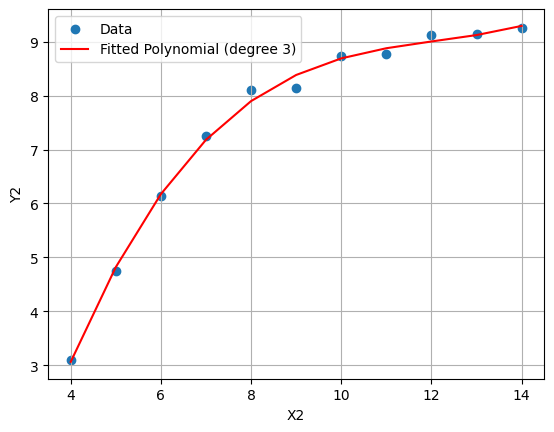

In [76]:
coefficients = np.polyfit(x2, y2, 3)
polynomial_func = np.poly1d(coefficients)

# Generate x values for plotting
x_values = np.linspace(min(x2), max(x2), 11)

# Evaluate the polynomial function at x values
y_poly = polynomial_func(x2)
print(y_poly)

# Plotting the data and the fitted polynomial
plt.scatter(x2, y2, label='Data')
plt.plot(x_values, y_poly, color='red', label='Fitted Polynomial (degree 3)')
plt.xlabel('X2')
plt.ylabel('Y2')
plt.legend()
plt.grid(True)
plt.show()

In [78]:
from scipy.interpolate import lagrange
p_lagrange = lagrange(X1, Y1)
original_x = np.array(X1)
y_lag = p_lagrange(original_x)

# Print the predicted y values
print("Predicted y values using Lagrange interpolation:")
print(y_lag)

Predicted y values using Lagrange interpolation:
[8.1  8.14 8.74 8.77 9.13 9.14]


In [79]:
# error finding using RMSE between y_poly and y2_values
rmse_poly_original=[]
for i in range(len(y_poly)):
  rmse_poly_original.append(RMSE(y2[i],y_poly[i]))
print(rmse_poly_original)
np.mean(rmse_poly_original)

[0.03895104895104007, 0.0791608391608456, 0.04368298368298529, 0.07861305361305782, 0.2009557109557143, 0.24342657342656615, 0.04869463869464852, 0.10945221445219566, 0.12536130536133072, 0.016363636363672995, 0.033216783216737156]


0.09253443526170857

In [80]:
# error finding using RMSE between y_lag and y2_values
rmse_lag_original=[]
for i in range(len(y_lag)):
  rmse_lag_original.append(RMSE(y2[i],y_lag[i]))
print(rmse_lag_original)
np.mean(rmse_lag_original)

[4.999999999951251, 3.3999999999425743, 2.6099999999283865, 1.5099999999035756, 1.0299999998700518, 0.9999999998284324]


2.4249999999040455

In [81]:
# In this case error value of y_poly is lesser than than of langrange

# As  y-poly tries to fit the datasets in the curve
# As  y_langrange using the formula fit the points according to the dataset making it more closer to the real values

#CONCLUSION
# we are trying to get the langrange interpolation of subset at the end of dataset
# but while taking RMSE we took it from start making it greater error than the other one